### Objective of the Problem

This problem solves **binary classification** task using machine learning techniques, where we aim to predict whether a loan would be approved or not based on the customer details provided while filling out the online application form.
<br>
This notebook is divided into the following 3 sections:

1. **Introduction to the Problem**  
2. **Exploratory Data Analysis (EDA) and Preprocessing**  
3. **Feature Engineering and Model Building**



**Assignment Name:** "Credit Worthiness of Customer (Classification Problem)"
<br>
**Assignment done by:** Aahna Shresth
<br>
**Roll No.:** DST-24/25-023

### 1.Description of Dataset

The dataset consists of information collected from applicants for a loan. It includes demographic details, income-related information, credit history, and the loan status (i.e., whether the loan was approved or not). There are a total of **13 columns**, with a mix of categorical and numerical variables.
<br>
Below is a brief description of each column:

- **Loan_ID**: Unique identifier for each loan application.
- **Gender**: Gender of the applicant (Male/Female).
- **Married**: Marital status of the applicant (Yes/No).
- **Dependents**: Number of dependents the applicant has (0, 1, 2, 3+).
- **Education**: Education level of the applicant (Graduate/Not Graduate).
- **Self_Employed**: Indicates whether the applicant is self-employed (Yes/No).
- **ApplicantIncome**: Monthly income of the applicant.
- **CoapplicantIncome**: Monthly income of the co-applicant (if any).
- **LoanAmount**: Loan amount (in thousands).
- **Loan_Amount_Term**: Term of the loan (in months).
- **Credit_History**: Credit history of the applicant (1.0 indicates good credit, 0.0 indicates poor credit).
- **Property_Area**: Area where the property is located (Urban/Semiurban/Rural).
- **Loan_Status**: Target variable indicating whether the loan was approved (Y) or not (N).

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings  
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/root/03_Ela/Project/Others/loan_sanction_information.csv')

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [5]:
df['Loan_Status'].value_counts()

Loan_Status
N    559
Y    422
Name: count, dtype: int64

In [6]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
N    0.569827
Y    0.430173
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

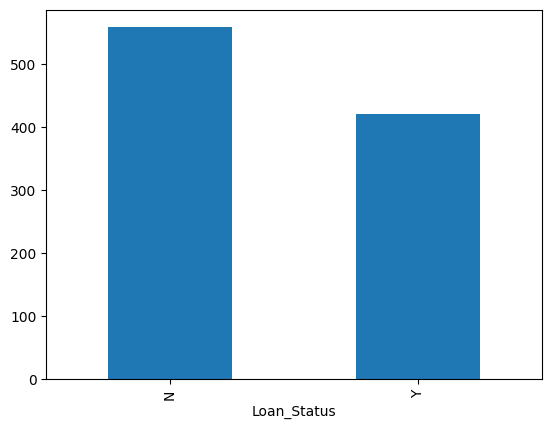

In [7]:
df['Loan_Status'].value_counts().plot.bar()

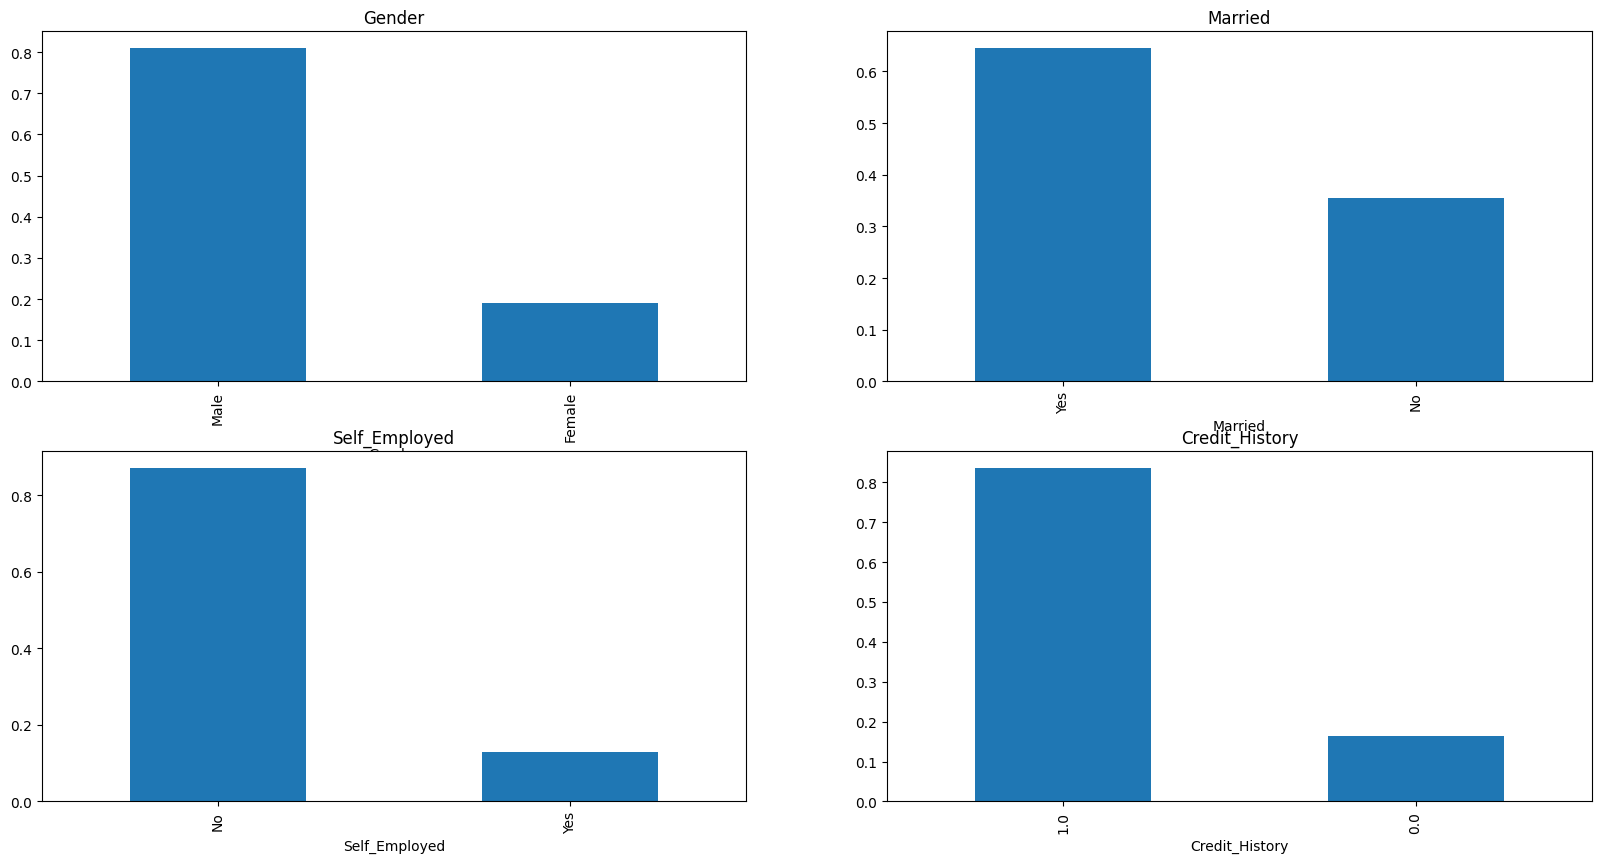

In [8]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

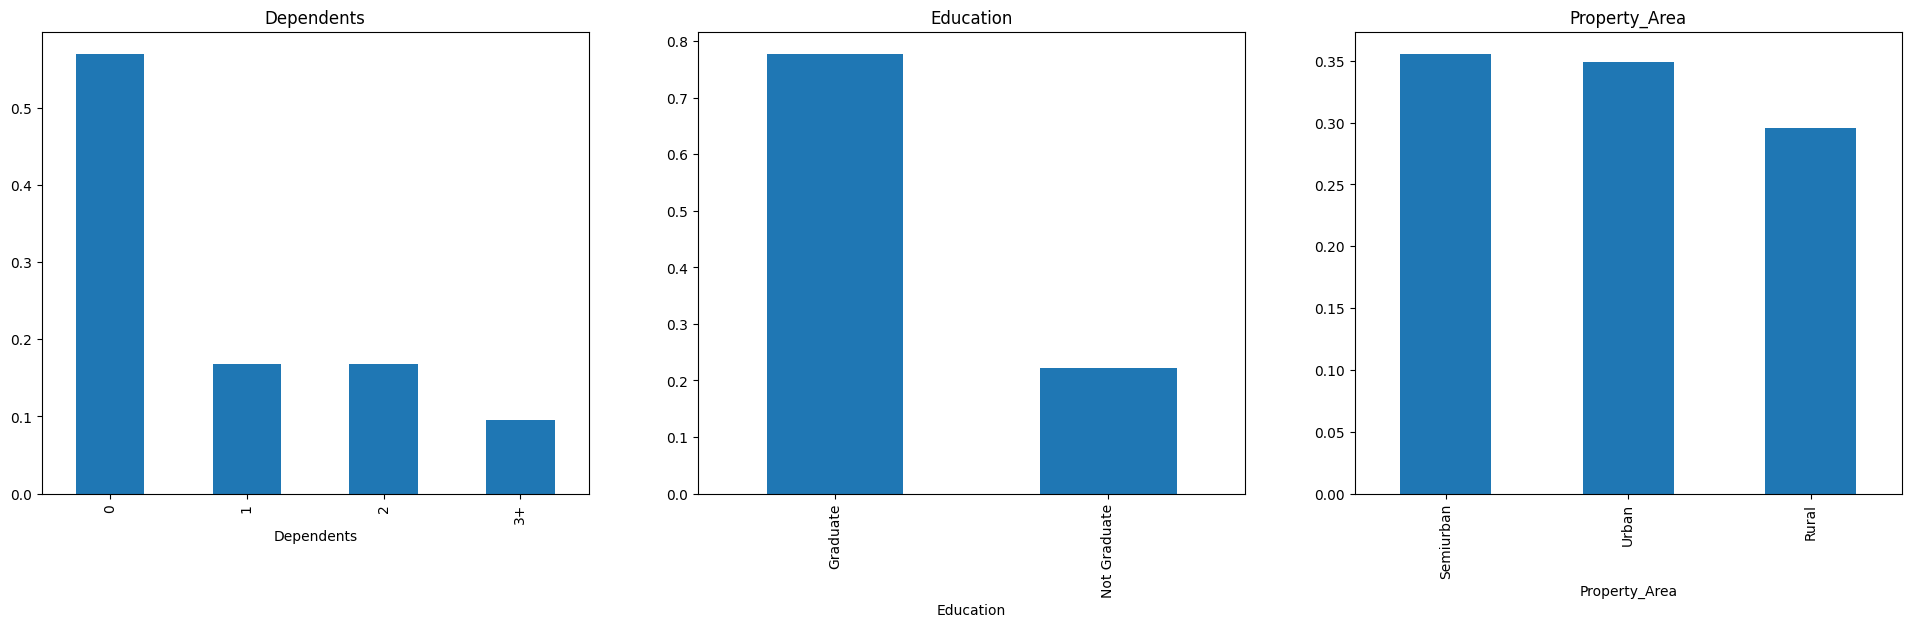

In [9]:
plt.figure(1) 
plt.subplot(131) 
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

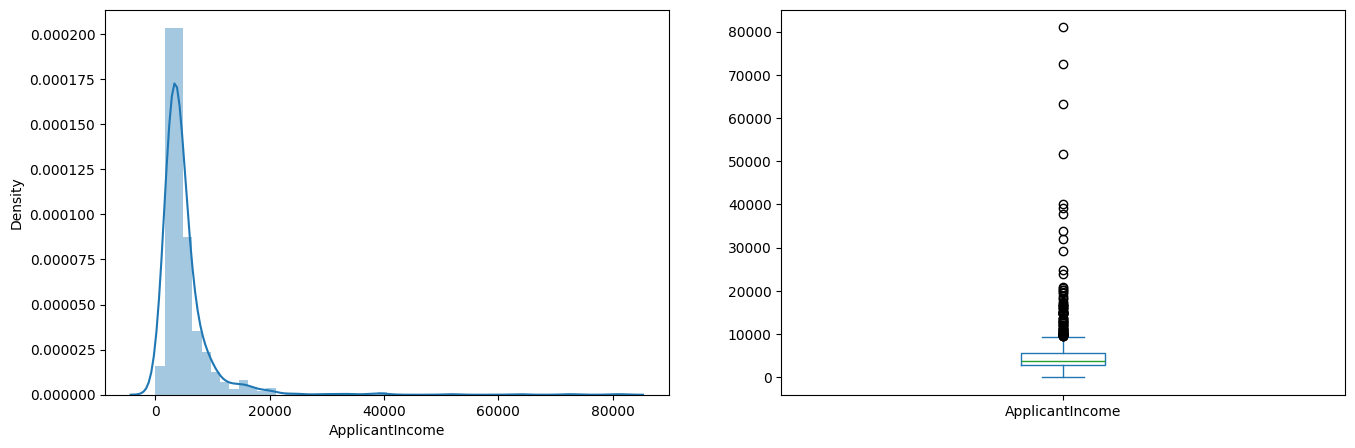

In [10]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['ApplicantIncome']); 
plt.subplot(122) 
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

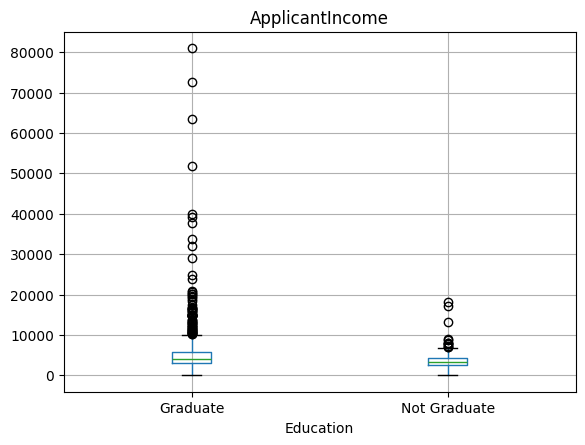

In [11]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

In [ ]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['CoapplicantIncome']); 
plt.subplot(122) 
df['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [ ]:
plt.figure(1) 
plt.subplot(121) 
df=df.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [ ]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [ ]:
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Education=pd.crosstab(df['Education'],df['Loan_Status']) 
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [ ]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

In [ ]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [ ]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [ ]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [ ]:
Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

In [ ]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

In [ ]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],df['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [ ]:
df=df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df['Dependents'].replace('3+', 3,inplace=True) 
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

##### Imputation

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df['Loan_Amount_Term'].value_counts()

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20) 

### 2.Model Selection and Algorithms Used

To solve this binary classification problem, I have experimented with multiple machine learning algorithms to identify the best-performing model for predicting loan approval status. The following models were implemented and evaluated:

- **Logistic Regression**: A effective linear model suitable for binary classification tasks.
- **Random Forest Classifier**: An ensemble method based on decision trees, known for its robustness and ability to handle overfitting.
- **AdaBoost Classifier**: An ensemble boosting algorithm that combines weak learners to form a strong classifier.
- **XGBoost Classifier**: A highly efficient and scalable gradient boosting algorithm, often delivering superior performance in structured data problems.

Model selection was guided by evaluating key performance metrics such as accuracy, precision, recall, F1-score, and AUC-ROC using cross-validation. Hyperparameter tuning was also performed to optimize each model’s performance.


In [ ]:
df=df.drop('Loan_ID',axis=1)

In [ ]:
df_sample=df.sample(frac=0.8)
X_sample = df_sample.drop('Loan_Status',axis = 1)
y_sample = df_sample.Loan_Status
X_sample = pd.get_dummies(X_sample)

In [ ]:
X = df.drop('Loan_Status',axis = 1)
y = df.Loan_Status

In [ ]:
X=pd.get_dummies(X) 
df=pd.get_dummies(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
X_train=X_sample.copy()
y_train=y_sample.copy()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                           precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))



## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)   
ada_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=1, max_depth=10)     
rf_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))



## XGboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier(n_estimators=50, max_depth=4)     
xgb_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

### Final Model Selection
Based on the performance on the test set, the **Random Forest Classifier** achieved the best overall results:
<br>
**Accuracy:** 91.56%
<br>
F1 Score: 91.58%
<br>
Precision: 88.24%
<br>
Recall: 92.31%
<br>
ROC AUC Score: 91.66%

## Soft voting (Aggregation Rule)

In [ ]:
# Get predicted probabilities
log_pred_prob = log_reg.predict_proba(X_test)
ada_pred_prob = ada_clf.predict_proba(X_test)
rf_pred_prob = rf_clf.predict_proba(X_test)
xgb_pred_prob = xgb_clf.predict_proba(X_test)

# Average the probabilities
avg_pred_prob = (log_pred_prob + ada_pred_prob + rf_pred_prob + xgb_pred_prob) / 4

# Final prediction based on highest average probability
final_preds = np.argmax(avg_pred_prob, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Assuming y_test is your true labels
accuracy = accuracy_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)

print(f"Ensemble Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


## VotingClassifier (Alternative)

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('ada', ada_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # Use 'hard' for majority voting
)

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_ensemble))


## Aggregation Rule
We used soft voting: averaging the predicted probabilities of all 4 models.
<br>
This ensemble reduces individual model bias and leverages the strengths of all classifiers.
<br>
Then Evaluated on test data and compared with individual models.